# Survey of Consumer Finances Exploratory Data Analysis

## Analyst: Max Bicking

## Table of Contents

1. Background

* About the Survey
* Data Dictionary
* Importing Libraries & Data
* Preliminary Dataset Descriptions
* Relevant Columns
<br>
<br>
2. Exploratory Analysis

* Questions & Focus
* Part 1: Credit Denial Fear
    * Race
    * Gender
    * Education
    * Professional Industry
* Part 2: Financial Literacy
    * Age
    * Education
    * Income
* Part 3: Risk
    * Education
    * Family Structure
    * Income
<br>
<br>
3. Summary



### About the Survey

https://www.federalreserve.gov/econres/aboutscf.htm

The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families’ balance sheets, pensions, income, and demographic characteristics. Information is also included from related surveys of pension providers and the earlier such surveys conducted by the Federal Reserve Board. No other study for the country collects comparable information. Data from the SCF are widely used, from analysis at the Federal Reserve and other branches of government to scholarly work at the major economic research centers.

The data contained in this exploratory analysis were collected as part of the 2019 Survey.

### Data Dictionary

https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm

Each ROW in the dataset corresponds to a survey respondent, and COLUMNS represent demographic financial data for each respondent.

In [347]:
# Import all necessary libraries.

import pandas as pd                     #Pandas will allow us to use Data Frames to analyze specific rows and columns from the dataset.
import matplotlib.pyplot as plt         #Matplotlib enables graphical analysis
import seaborn as sns                   #Seaborn is an additional graphical tool
import numpy as np                      #Numpy will allow us to use more advanced mathematical operations, if necessary
from textwrap import wrap               #Allows us to wrap plot labels

In [3]:
# Read in Survey data with Pandas

survey = pd.read_csv("SCFP2019.csv")

In [422]:
survey = survey.dropna()

survey

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,Female,75,6,12,college degree,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,Female,75,6,12,college degree,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,Female,75,6,12,college degree,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,Female,75,6,12,college degree,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,Female,75,6,12,college degree,2,0,...,5,3,6,3,1,10,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,5813,58131,667.098300,Male,51,3,5,no high school diploma/GED,1,0,...,5,6,6,6,3,11,11,11,4,4
28881,5813,58132,678.821856,Male,51,3,5,no high school diploma/GED,1,0,...,5,6,6,6,3,11,11,11,4,4
28882,5813,58133,640.908142,Male,51,3,5,no high school diploma/GED,1,0,...,5,6,6,6,3,11,11,11,4,4
28883,5813,58134,665.152072,Male,51,3,5,no high school diploma/GED,1,0,...,5,6,6,6,3,11,11,11,4,4


In [423]:
# Determine the number of rows and columns in the dataset

num_rows = survey.shape[0]
num_columns = survey.shape[1]

print(f"The survey contains {num_rows} rows and {num_columns} columns.")

The survey contains 28880 rows and 351 columns.


* As the dataset contains 351 different columns, each containing unique demographic and financial data for each respondent, <br> 
it will be essential for us to narrow our focus to a smaller selection of columns.

### Columns Relevant to This Analysis

* HHSEX

    Respondent's gender identity

    1 - Male <br>
    2 - Female <br>
<br>
<br>

* RACE

    Respondent's race/ethnicity
    
    1 - White/Non-Hispanic <br>
    2 - Black/African American <br>
    3 - Hispanic <br>
    5 - Other <br>
<br>
<br>

* AGECL

    Age of respondent  
    1 - < 35 <br>
    2 - 35-44 <br> 
    3 - 45-54 <br>
    4 - 55-64 <br>
    5 - 65-74 <br>
    6 - > - 75 <br>
<br>
<br>

* EDCL

    Eductational category of respondent

    1 - no high school diploma/GED <br>
    2 - high school diploma or GED <br>
    3 - some college, no degree <br>
    4 - college degree <br>
<br> 
<br>

* FAMSTRUCT

    Family structure of household

    1 - not married/LWP + children <br>
    2 - not married/LWP + no children + reference person under 55 <br>
    3 - not married/LWP + no children + reference person 55 or older <br>
    4 - married/LWP+ children <br>
    5 - married/LWP + no children <br>
<br>
<br>

* INCQRTCAT

    Respondent's income quartile group

    1 - 0-24.9 (0th to 24.9th percentile, lowest) <br>
    2 - 25-49.9 <br>
    3 - 50-74.9 <br>
    4 - 75-100 (75-99.99th percentile, highest) <br>
<br>
<br>

* INDCAT

    Industry category of respondent

    1 - mining + construction + manufacturing <br>
    2 - transportation + communications + utilities and sanitary services + wholesale trade + finance, insurance and real estate <br>
    4 - agriculture + retail trade + services + public administration <br>
<br>
<br>

* TURNFEAR

    Household has been denied credit, or has feared being denied credit, in the last 5 years

    0 - No <br>
    1 - Yes <br>
<br>
<br>

* FINLIT

    Number of financial literacy questions answered correctly, out of 3 <br>
<br>
<br>

* YESFINRISK

    Respondent willing to take financial risk

    0 - No <br>
    1 - Yes

# Exploratory Analysis

### Questions this analysis will explore:

* Which respondents are fearful of being denied credit? Is their fear related to race, gender, industry, and/or education?
* How is financial literacy related to demographics?
* Which respondents are more willing to take on financial risk? What factors might be at play?

In [424]:
# Replace RACE, HHSEX, FEARDENIAL, and EDCL columns with dictionary word values. This will make our graphs easier to interpret.

race_dict = {1 : "White", 2 : "Black", 3 : "Hispanic", 5 : "Other"}
gender_dict = {1 : "Male", 2 : "Female"}
fear_dict = {0 : "No", 1 : "Yes"}
edcl_dict = {1 : "no high school diploma/GED", 
            2 : "high school diploma or GED", 
            3 : "some college, no degree", 
            4 : "college degree"}

survey["RACE"].replace(race_dict, inplace = True)
survey["HHSEX"].replace(gender_dict, inplace = True)
survey["FEARDENIAL"].replace(fear_dict, inplace = True)
survey["EDCL"].replace(edcl_dict, inplace = True)

plt.style.use("fivethirtyeight") #This is one of a few plot styles we'll use

# Part 1: Credit Denial Fear

## Race

In [425]:
survey["RACE"].value_counts()

White       20703
Black        3757
Hispanic     2786
Other        1634
Name: RACE, dtype: int64

This dataset contains significantly more white respondents than any other race category. In order to effectively study <br> 
the link between race and fear of credit denial, we must "normalize" our dataset - that is, we need to find out the percentage <br>
of fearful/not fearful within each race category separately. Instead of asking "how many fearful respondents are race x",<br> 
we should ask "what portion of race x are fearful?" 

<AxesSubplot:title={'center':'People of Color Surveyed Are Disproportionately Fearful of Being Denied Credit'}, ylabel='Proportion of All Respondents in Race'>

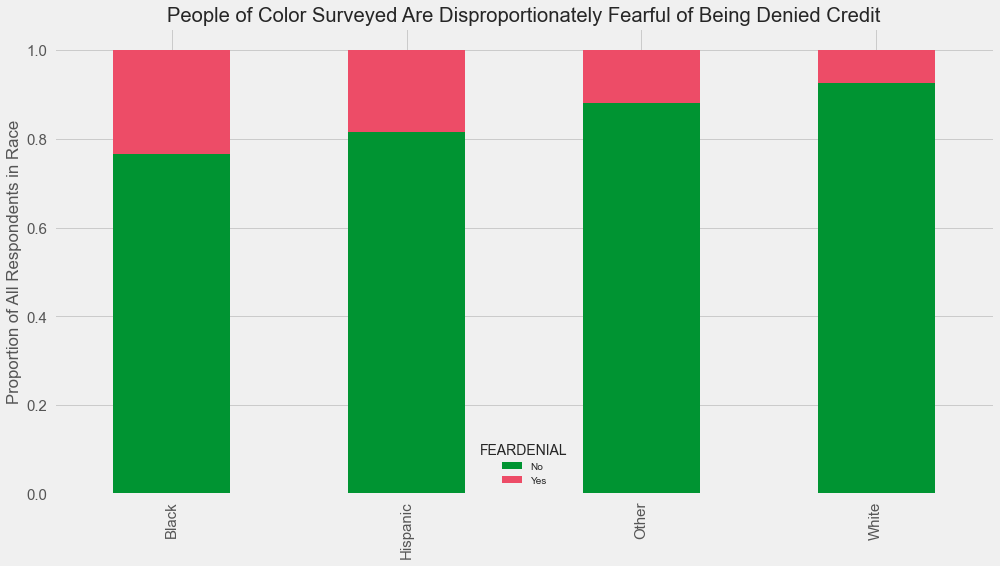

In [426]:
pro_race_fear = survey.groupby("RACE")["FEARDENIAL"].value_counts(normalize = True).unstack("FEARDENIAL") #Normalize portions based on RACE and TURNFEAR

pro_race_fear.plot.bar(stacked = True, 
                        figsize = (15, 8), color= ["#009432", "#ED4C67"],
                        title = "People of Color Surveyed Are Disproportionately Fearful of Being Denied Credit",
                        xlabel = "", 
                        ylabel = "Proportion of All Respondents in Race",
                        fontsize = 15)

In [427]:
pro_race_fear

FEARDENIAL,No,Yes
RACE,,
Black,0.764972,0.235028
Hispanic,0.815147,0.184853
Other,0.880049,0.119951
White,0.924310,0.075690


The above graph lists each race category of the Survey, with the height of each bar representing the portion of respondents <br>
in that race category who are fearful of being denied credit (red) and not fearful (green). Notably, the majority of all <br>
respondents are not fearful, but People of Color in this survey voiced highed levels of fear, on average, of being denied. <br>

In particular, while 7% of White respondents were fearful of being denied, over 3 times as many (24%) Black respondents <br>
voiced fears. Hispanic respondents were more than twice as likely, at 18%, as their White counterparts to express fears <br>
and 11% respondents of Other races said that the were fearful. 

## Gender

In [428]:
survey["HHSEX"].value_counts() #There are significantly more male respondents

Male      22415
Female     6465
Name: HHSEX, dtype: int64

<AxesSubplot:title={'center':'Women Surveyed Are Disproportionately Fearful of Being Denied Credit'}, ylabel='Proportion of All Respondents in Gender'>

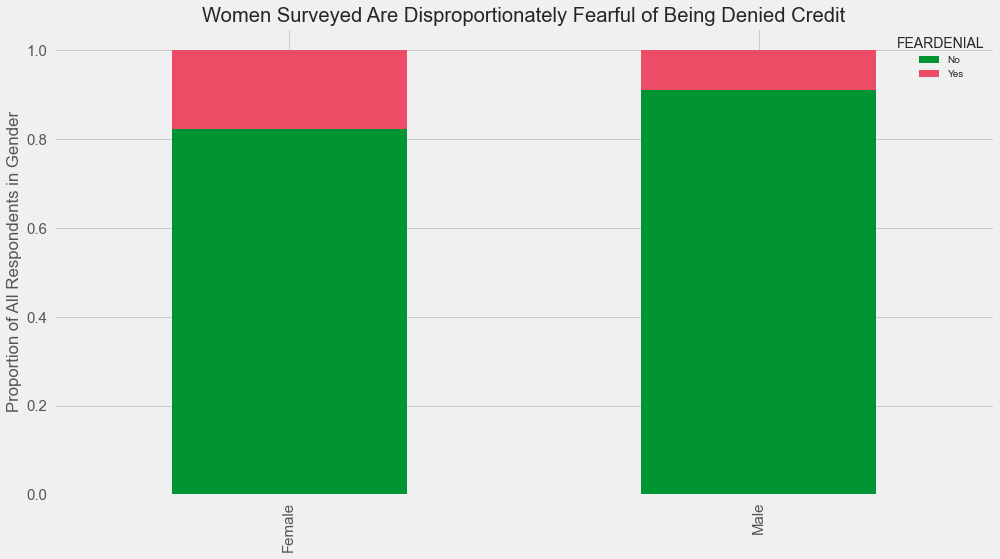

In [429]:
pro_gender_fear = survey.groupby("HHSEX")["FEARDENIAL"].value_counts(normalize = True).unstack("FEARDENIAL") #Normalize here as well to account for distribution of responses

pro_gender_fear.plot.bar(stacked = True, 
                        figsize = (15, 8), color= ["#009432", "#ED4C67"],
                        title = "Women Surveyed Are Disproportionately Fearful of Being Denied Credit",
                        xlabel = "",
                        ylabel = "Proportion of All Respondents in Gender",
                        fontsize = 15)

In [430]:
pro_gender_fear

FEARDENIAL,No,Yes
HHSEX,,
Female,0.822274,0.177726
Male,0.910239,0.089761


About 9% of Male respondents in the Survey said they were fearful of being denied credit. <br>
Twice as many Women (18%) said they feared being denied. 

## Education

In [431]:
survey["EDCL"].value_counts()

college degree                13265
some college, no degree        7032
high school diploma or GED     6016
no high school diploma/GED     2567
Name: EDCL, dtype: int64

<AxesSubplot:title={'center':'Respondents with College Degrees Are Less Fearful of Being Denied Credit'}, ylabel='Proportion of All Respondents in Ed Category'>

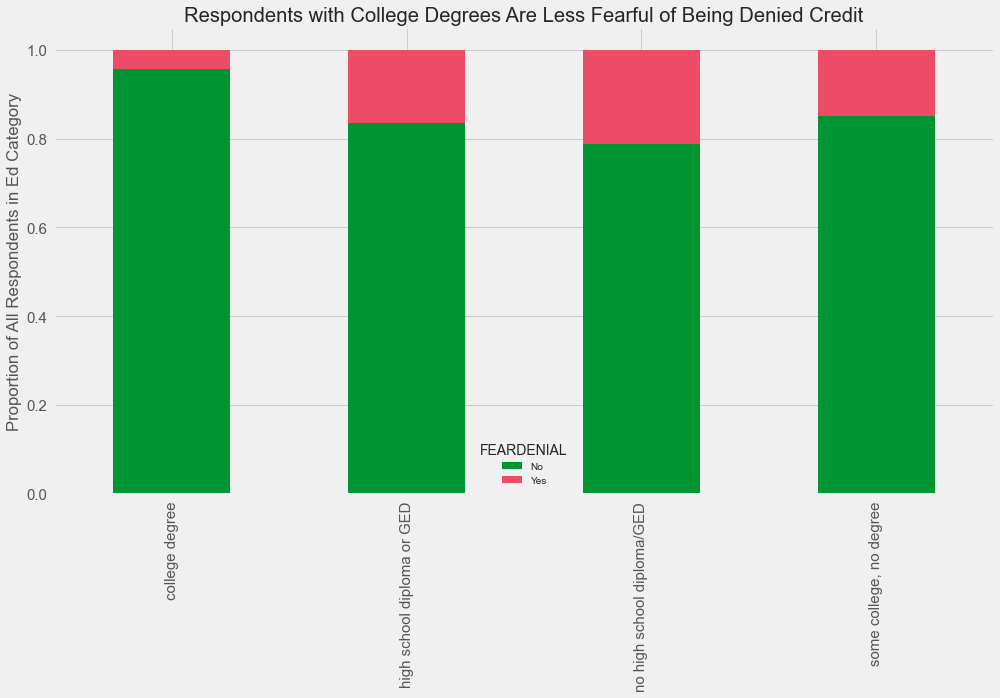

In [432]:
pro_edcl_fear = survey.groupby("EDCL")["FEARDENIAL"].value_counts(normalize = True).unstack("FEARDENIAL")

pro_edcl_fear.plot.bar(stacked = True, 
                        figsize = (15, 8), color= ["#009432", "#ED4C67"],
                        title = "Respondents with College Degrees Are Less Fearful of Being Denied Credit",
                        xlabel = "",
                        ylabel = "Proportion of All Respondents in Ed Category",
                        fontsize = 15)  

In [433]:
pro_edcl_fear

FEARDENIAL,No,Yes
EDCL,,
college degree,0.956351,0.043649
high school diploma or GED,0.834774,0.165226
no high school diploma/GED,0.787690,0.212310
"some college, no degree",0.851678,0.148322


College graduates had the lowest credit denial fear rate (4%). Comversely, 21% of respondents who did not obtain <br> 
a high school diploma feared being denied. This is __over five times__ the rate of college graduates. <br>

High school graduates (17%) were four times more likely to respond with fears than college graduates, <br>
and respondents who went to college but did not graduate were about three times more likely (14%) to voice fears.

## Professional Industry

In [434]:
survey["INDCAT"].value_counts() 

2    16466
4     7825
1     4589
Name: INDCAT, dtype: int64

* Note: These industry categories are extrmely broad, and may have an impact on the results.<br>

1 - mining + construction + manufacturing <br>
2 - transportation + communications + utilities and sanitary services + wholesale trade + finance, insurance and real estate <br>
4 - agriculture + retail trade + services + public administration <br>

<AxesSubplot:title={'center':'No Significant Differences in Credit Denial Fear Across Industries'}, ylabel='Proportion of All Respondents in Industry Category'>

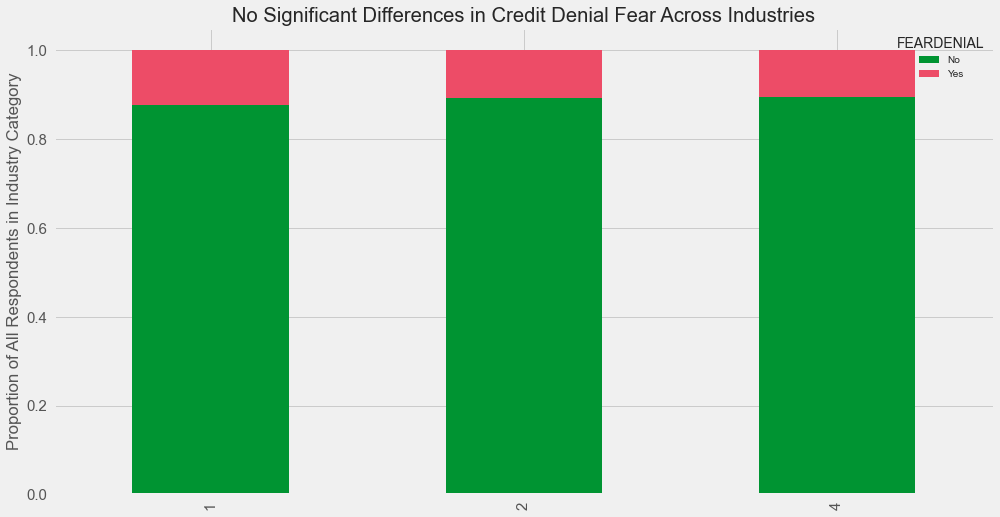

In [435]:
pro_indcat_fear = survey.groupby("INDCAT")["FEARDENIAL"].value_counts(normalize = True).unstack("FEARDENIAL")

pro_indcat_fear.plot.bar(stacked = True, 
                        figsize = (15, 8), color= ["#009432", "#ED4C67"],
                        title = "No Significant Differences in Credit Denial Fear Across Industries",
                        xlabel = "",
                        ylabel = "Proportion of All Respondents in Industry Category",
                        fontsize = 15)  

In [436]:
pro_indcat_fear

FEARDENIAL,No,Yes
INDCAT,,
1,0.876444,0.123556
2,0.892870,0.107130
4,0.893930,0.106070


Overall, respondents from all industries expressed fears to about the same degree. 

# Part 2: Financial Literacy

Respondents were asked the following multiple choice 3 questions:

1. Buying a single company’s stock is safer than stock mutual fund. (True/False) [__ANSWER: FALSE__]

2. How much in a savings account with $100 after 5 years at 2% interest rate? (More than $102/Exactly $102/Less than $102) [__ANSWER: MORE__]

3. Imagine that the interest rate on your savings account was 1 percent per year and inflation was 2 percent per year. <br>
    After one year, would you be able to buy: (More than today/Same as today/Less than today) [__ANSWER: LESS__] <br>
<br>
<br>
These questions were intended to assess respondent's financial literacy. Their score 0-3 was recorded in the column FINLIT.

In [437]:
scores = survey["FINLIT"].value_counts().sort_index()
scores

0      940
1     4260
2     8615
3    15065
Name: FINLIT, dtype: int64

In [438]:
survey["FINLIT"].mean()

2.3090373961218837

Text(0, 0.5, 'Num Respondents')

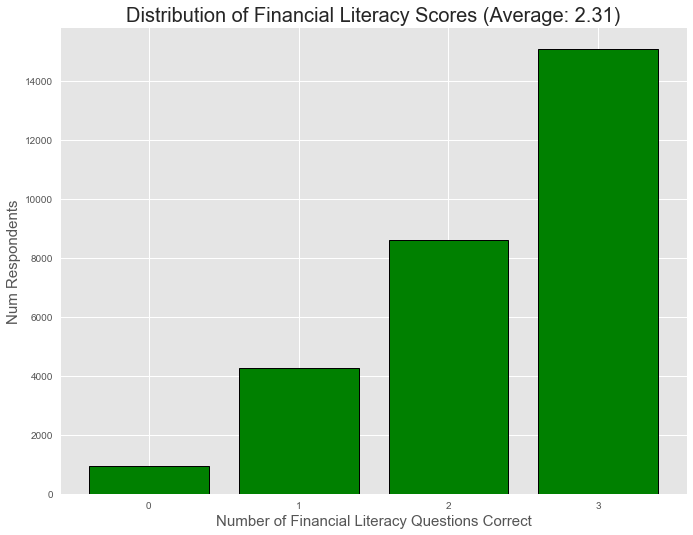

In [439]:
score_labels = [0, 1, 2, 3]

plt.style.use("ggplot")
plt.figure(figsize = (10, 8))

plt.bar(score_labels, scores, color = "#008000", edgecolor = "black", linewidth = 1)

plt.title("Distribution of Financial Literacy Scores (Average: 2.31)", fontsize = 20)
plt.xticks(score_labels)
plt.xlabel("Number of Financial Literacy Questions Correct", fontsize = 15)
plt.ylabel("Num Respondents", fontsize = 15)

## Age

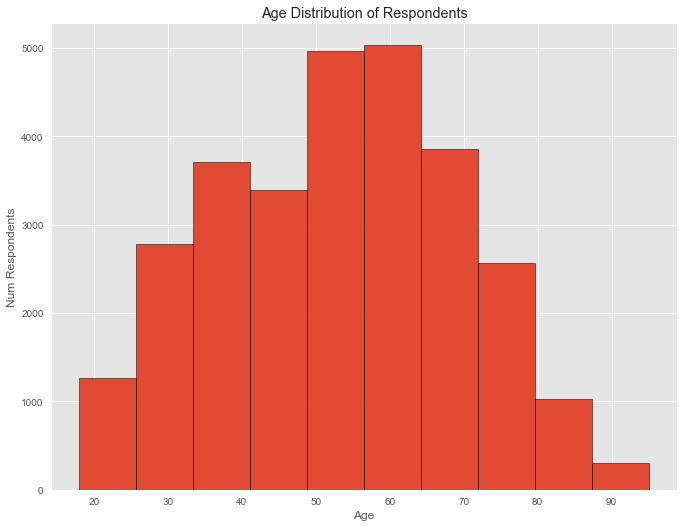

In [440]:
ages = survey["AGE"] #using AGE rather than AGECL here to show a more continuous distribution of ages

plt.figure(figsize = (10, 8))
plt.hist(ages, edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Num Respondents")
plt.title("Age Distribution of Respondents")
plt.show()

In [441]:
fin_age = survey.groupby("AGECL")["FINLIT"].mean()
fin_age


AGECL
1    2.021764
2    2.177778
3    2.362345
4    2.461358
5    2.443330
6    2.283394
Name: FINLIT, dtype: float64

In [213]:
age_groups = ["Under 35", "35-44", "45-54", "55-64", "65-74", "Over 75"]

Text(0.5, 1.0, 'Average Financial Literacy Score by Age Group')

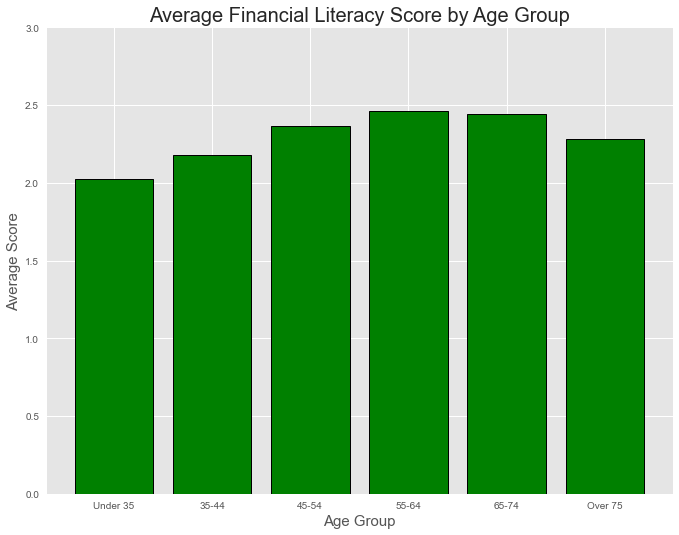

In [442]:
plt.figure(figsize = (10, 8))

plt.bar(age_groups, fin_age, color = "#008000", edgecolor = "black", linewidth = 1)

plt.xlabel("Age Group", fontsize = 15)
plt.ylabel("Average Score", fontsize = 15)
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.title("Average Financial Literacy Score by Age Group", fontsize = 20)


Scores seem to improve slightly with age, but decrease after age 64. 

## Education

<AxesSubplot:title={'center':"Distribution of Respondents' Education"}>

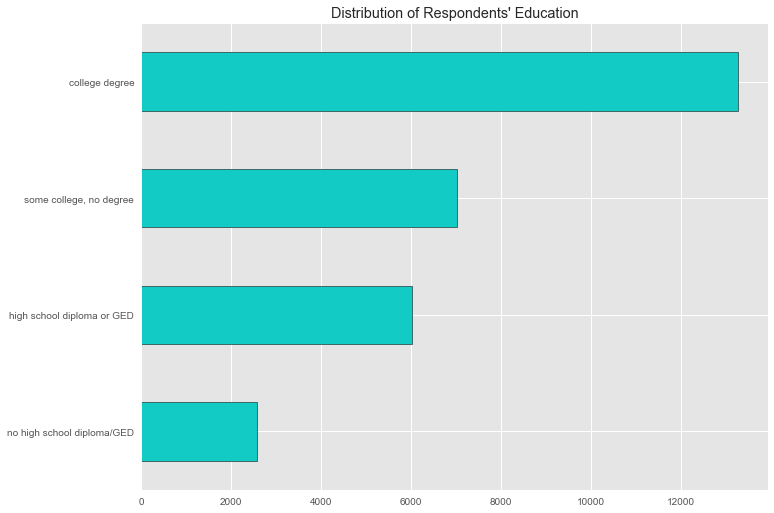

In [443]:
edcl = survey["EDCL"].value_counts().sort_values()

edcl.plot(kind = "barh", 
        color = "#12CBC4", 
        figsize = (10,8), 
        edgecolor = "black", 
        title = "Distribution of Respondents' Education")

In [444]:
fin_edcl = survey.groupby("EDCL")["FINLIT"].mean().sort_values(ascending = False)
fin_edcl

EDCL
college degree                2.645232
some college, no degree       2.172639
high school diploma or GED    2.010472
no high school diploma/GED    1.645111
Name: FINLIT, dtype: float64

In [260]:
edcl_groups = ["College Degree", "Some College, No Degree", "High School Diploma/GED", "No High School Diploma/GED"]

Text(0.5, 1.0, 'Average Financial Literacy Score by Education')

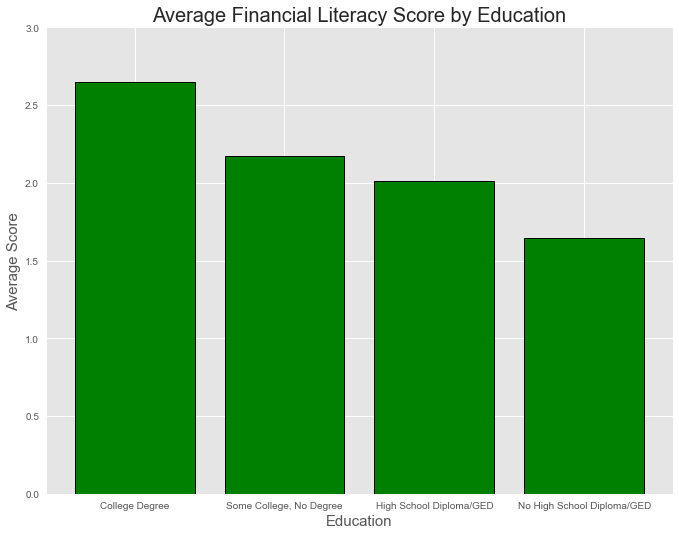

In [445]:
plt.figure(figsize = (10, 8))

plt.bar(edcl_groups, fin_edcl, color = "#008000", edgecolor = "black", linewidth = 1)

plt.xlabel("Education", fontsize = 15)
plt.ylabel("Average Score", fontsize = 15)
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.title("Average Financial Literacy Score by Education", fontsize = 20)

Education is a key factor in financial literacy. College graduates had an average score of 2.64, <br>
while respondents without a high school diploma obtained an average score of 1.64 - __one full correct answer less__.

## Income

In [447]:
fin_inc = survey.groupby("INCQRTCAT")["FINLIT"].mean().sort_values(ascending = False)
fin_inc

INCQRTCAT
4    2.699479
3    2.278126
2    2.001798
1    1.866316
Name: FINLIT, dtype: float64

In [269]:
inc_groups = ["Fourth (Highest)", "Third", "Second", "First (Lowest)"]

Text(0.5, 1.0, 'Average Financial Literacy Score by Income Quartile')

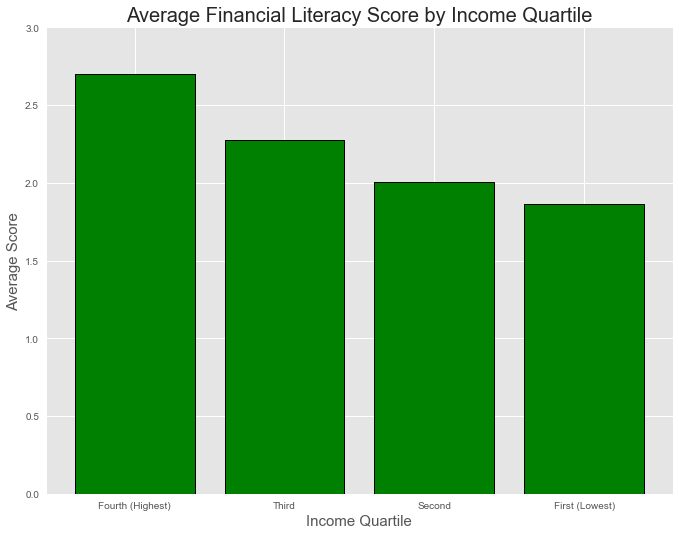

In [448]:
plt.figure(figsize = (10, 8))

plt.bar(inc_groups, fin_inc, color = "#008000", edgecolor = "black", linewidth = 1)

plt.xlabel("Income Quartile", fontsize = 15)
plt.ylabel("Average Score", fontsize = 15)
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.title("Average Financial Literacy Score by Income Quartile", fontsize = 20)

Income Quartile seems to be another key factor in financial literacy. Intuitively, this makes sense - <br>
higher income is correlated with education (__see Summary__); additionally, individuals with higher income <br>
might need a greater understanding of finances in order to sustain their wealth. 

# Part 3: Financial Risk

In [449]:
survey["YESFINRISK"].value_counts()

0    27445
1     1435
Name: YESFINRISK, dtype: int64

## Education

In [450]:
yes_fin_risk = survey[survey["YESFINRISK"] == 1]["EDCL"].value_counts()
no_fin_risk  = survey[survey["YESFINRISK"] == 0]["EDCL"].value_counts()

edcl_groups = ["College Degree", "Some College, No Degree", "High School Diploma/GED", "No High School Diploma/GED"]

Text(0.5, 1.0, 'Not Willing to Take Financial Risk')

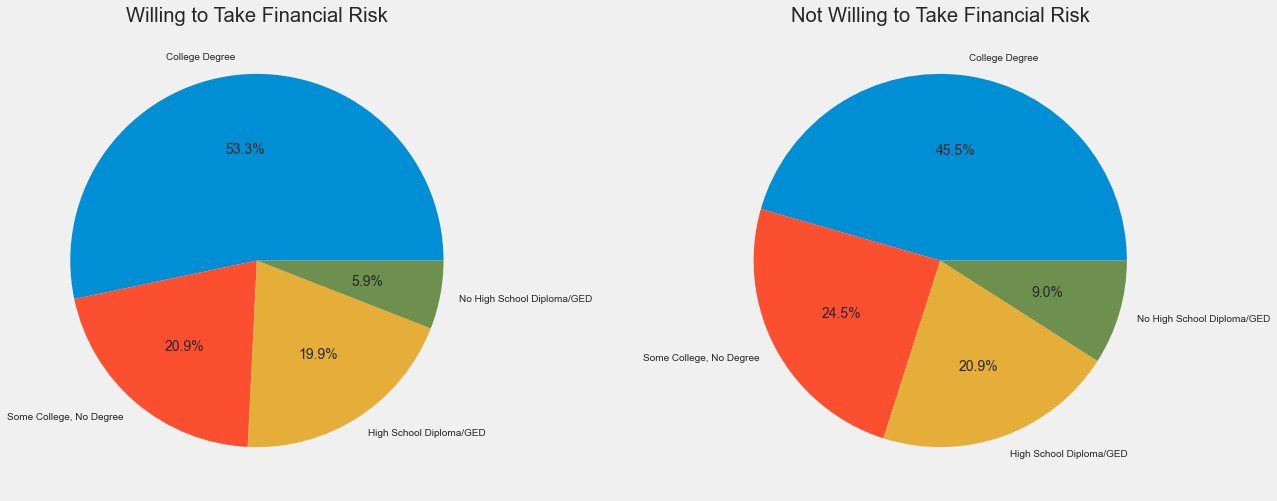

In [451]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
plt.pie(yes_fin_risk, labels = edcl_groups, autopct="%1.1f%%")
plt.title("Willing to Take Financial Risk")

plt.subplot(1, 2, 2)
plt.pie(no_fin_risk, labels = edcl_groups, autopct="%1.1f%%")
plt.title("Not Willing to Take Financial Risk")


College graduates were the most likely group to be willing to take on financial risk. This may be <br>
correlated with other factors in that group, such as higher income and greater financial literacy.

## Family Structure

In [452]:
fam_no_risk = survey[survey["YESFINRISK"] == 0]["FAMSTRUCT"].value_counts()
fam_risk = survey[survey["YESFINRISK"] == 1]["FAMSTRUCT"].value_counts()

fam_labels = ["married/LWP + no children", 
        "married/LWP+ children", 
        "not married/LWP + no children + reference person 55 or older", 
        "not married/LWP + no children + reference person under 55", 
        "not married/LWP + children"]

fam_labels = [ '\n'.join(wrap(l, 20)) for l in fam_labels ]

Text(0.5, 1.0, 'Not Willing to Take Financial Risk')

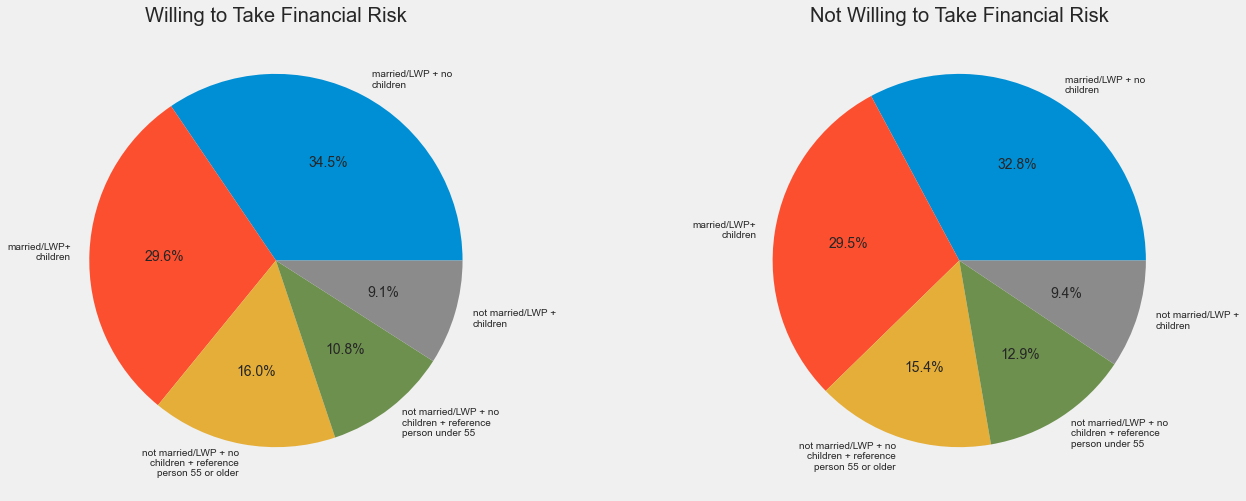

In [453]:
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
plt.pie(fam_risk, labels = fam_labels, autopct="%1.1f%%")
plt.title("Willing to Take Financial Risk")

plt.subplot(1, 2, 2)
plt.pie(fam_no_risk, labels = fam_labels, autopct="%1.1f%%")
plt.title("Not Willing to Take Financial Risk")

Family structure did not appear any significant connection to respondents' willingness <br>
to take on financial risk.

## Income

Text(0.5, 1.0, 'Not Willing to Take Financial Risk')

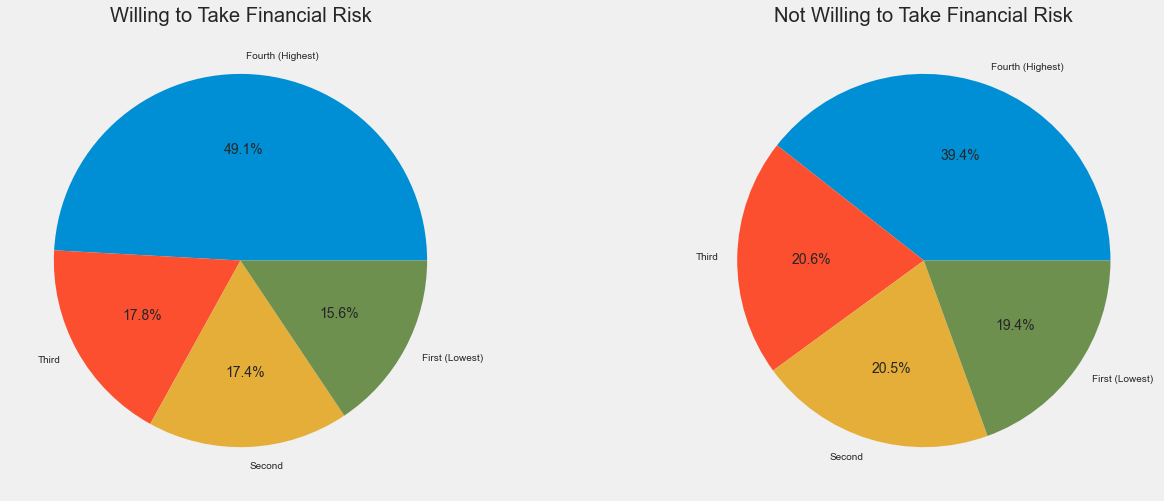

In [454]:
inc_no_risk = survey[survey["YESFINRISK"] == 0]["INCQRTCAT"].value_counts()
inc_risk = survey[survey["YESFINRISK"] == 1]["INCQRTCAT"].value_counts()

inc_groups = ["Fourth (Highest)", "Third", "Second", "First (Lowest)"]

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
plt.pie(inc_risk, labels = inc_groups, autopct="%1.1f%%")
plt.title("Willing to Take Financial Risk")

plt.subplot(1, 2, 2)
plt.pie(inc_no_risk, labels = inc_groups, autopct="%1.1f%%")
plt.title("Not Willing to Take Financial Risk")

Similar to education, income had a connecton to respondents' willingness to <br>
take on financial risk, with respondents in the highest income quartile making up <br>
about half of those who responded willingly. 

# Summary

<AxesSubplot:>

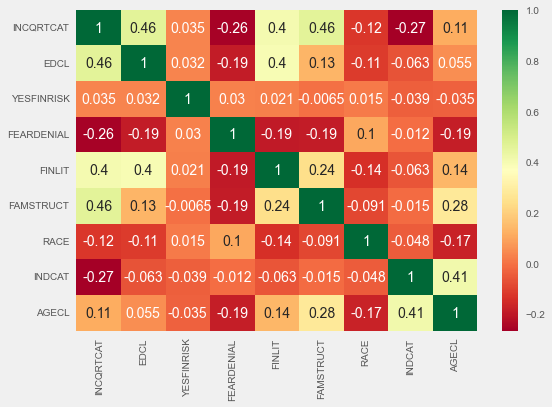

In [455]:
df = pd.read_csv("SCFP2019.csv")

df = df[["INCQRTCAT", "EDCL", "YESFINRISK", "FEARDENIAL", "FINLIT", "FAMSTRUCT", "RACE", "INDCAT", "AGECL"]]

cor = df.corr()

sns.heatmap(cor, annot = True, cmap = 'RdYlGn')

The above heatmap described the correlation between the variables studied in this Analysis. <br>

Variables with the highest correlation coefficients were:

* EDCL - INCQRTCAT: There was a correlation of 0.46 between education <br>
and income. This indicates that more educated individuals tend to have <br>
higher levels of income. 

* FAMSTRUCT - INCQRTCAT: The was a 0.46 correlation between family structure <br>
and income. This means that respondents who were married tended to have greater <br>
financial means, including couples with and without children. 

* FINLIT - INCQRTCAT: There was a correlation of 0.4 between financial <br>
literacy scores and income. This was discussed above, and could be inter- <br>
related with education.

* FINLIT - EDCL: A correlation of 0.4. Higher rates of education in general <br>
might relate to higher financial literacy.
